# Applied Financial Networks with Machine Learning 
## by Xingkong

# 1. Load packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from matplotlib.colors import ListedColormap
import networkx as nx
from numpy import nan
import math
import sys
import os

In [4]:
path = "/Users/xingkong/OneDrive/anomaly2018/data/fund_holding_shares_2017.xlsx"
df = pd.read_excel(path)

In [6]:
G = nx.from_pandas_edgelist(df, 'fund_code', 'stock', 
                             edge_attr=['holding_shares',
                                       'num_funds_coverage',
                                       'tot_share_holding(10k)',
                                       'seasonal_holding_change(10k)',
                                       'tot_maket_value(10k)',
                                       'market_funds_ratio(%)',
                                       'market_stock_ratio(%)'],
                             create_using=nx.Graph())

In [7]:
df.head()

,fund,fund_code,stock,holding_shares,num_funds_coverage,tot_share_holding(10k),seasonal_holding_change(10k),tot_maket_value(10k),market_funds_ratio(%),market_stock_ratio(%)
0,1,A,000513.SZ,0.046632,3,16.2279,16.2279,1078.343955,0.007537,0.011947
1,1,A,002534.SZ,0.098896,2,71.4000,71.4000,772.548000,0.005400,0.008559
2,1,A,000546.SZ,0.070999,2,40.0657,40.0657,715.172745,0.004999,0.007924
3,1,A,002444.SZ,0.049062,2,49.6433,49.6433,686.566839,0.004799,0.007607
4,1,A,601398.SH,0.001451,4,391.1000,141.1000,2424.820000,0.016948,0.026866


# 2. Node based Features

# Part I: Holding Information

## 2.1 Holding share degree

In [8]:
df2017 = pd.DataFrame(index=G.nodes())

In [9]:
df2017_hs = pd.Series(G.degree(weight='holding_shares'))
df2017_hs = pd.DataFrame(df2017_hs, columns=['nodes'])
df2017_hs[['nodes','hs_degree']] = df2017_hs['nodes'].apply(pd.Series)
df2017_hs.set_index('nodes', inplace=True)
df2017_hs

,hs_degree
nodes,
A,8.969755
000513.SZ,5.803624
002534.SZ,0.220765
000546.SZ,2.063638
002444.SZ,0.595563
601398.SH,0.541501
300415.SZ,4.482491
601155.SH,11.618351
601965.SH,0.381265


## 2.2 Number of funds coverage

In [10]:
df2017_nfc = pd.Series(G.degree(weight='num_funds_coverage'))
df2017_nfc = pd.DataFrame(df2017_nfc, columns=['nodes'])
df2017_nfc[['nodes','nfc_degree']] = df2017_nfc['nodes'].apply(pd.Series)
df2017_nfc.set_index('nodes', inplace=True)
df2017_nfc.head()

,nfc_degree
nodes,
A,242
000513.SZ,71
002534.SZ,4
000546.SZ,12
002444.SZ,6


## 2.3 Total share holdings

In [11]:
df2017_tsh = pd.Series(G.degree(weight='tot_share_holding(10k)'))
df2017_tsh = pd.DataFrame(df2017_tsh, columns=['nodes'])
df2017_tsh[['nodes','tsh_degree']] = df2017_tsh['nodes'].apply(pd.Series)
df2017_tsh.set_index('nodes', inplace=True)
df2017_tsh.head()

,tsh_degree
nodes,
A,25484.6684
000513.SZ,2019.6474
002534.SZ,159.3860
000546.SZ,1164.5352
002444.SZ,602.6234


## 2.4 Seasonal holdings changes

In [12]:
df2017_shc = pd.Series(G.degree(weight='seasonal_holding_change(10k)'))
df2017_shc = pd.DataFrame(df2017_shc, columns=['nodes'])
df2017_shc [['nodes','shc_degree']]= df2017_shc['nodes'].apply(pd.Series)
df2017_shc.set_index('nodes', inplace=True)
df2017_shc.head()

,shc_degree
nodes,
A,11141.9737
000513.SZ,509.8938
002534.SZ,159.3860
000546.SZ,831.8861
002444.SZ,44.6424


## 2.5 Total market value

In [13]:
df2017_tmv = pd.Series(G.degree(weight='tot_maket_value(10k)'))
df2017_tmv = pd.DataFrame(df2017_tmv, columns=['nodes'])
df2017_tmv[['nodes','tmv_degree']]= df2017_tmv['nodes'].apply(pd.Series)
df2017_tmv.set_index('nodes', inplace=True)
df2017_tmv.head()

,tmv_degree
nodes,
A,383334.063042
000513.SZ,133660.869730
002534.SZ,1724.556520
000546.SZ,20786.953320
002444.SZ,8334.281622


# Part II: Network Information

# 2.6 Closeness

In [14]:
df2017_closeness=pd.Series(nx.closeness_centrality(G))

In [15]:
df2017_closeness=pd.DataFrame(df2017_closeness, columns=['closeness_degree'])
df2017_closeness.head()

,closeness_degree
A,0.352671
000513.SZ,0.411970
002534.SZ,0.288017
000546.SZ,0.304895
002444.SZ,0.270987


# 2.7 Betweenness

In [16]:
df2017_betweenness=pd.Series(nx.betweenness_centrality(G, normalized=True))

In [17]:
df2017_betweenness=pd.DataFrame(df2017_betweenness, columns=['betweenness_degree'])
df2017_betweenness.head()

,betweenness_degree
A,0.003560
000513.SZ,0.003552
002534.SZ,0.000009
000546.SZ,0.000089
002444.SZ,0.000003


# 2.8 PageRank

In [18]:
df2017_pr=pd.Series(nx.pagerank(G))
df2017_pr=pd.DataFrame(df2017_pr, columns=['pagerank_degree'])
df2017_pr.head()

,pagerank_degree
A,0.002918
000513.SZ,0.001285
002534.SZ,0.000178
000546.SZ,0.000282
002444.SZ,0.000175


## 2.9 Merge nodes based features data

In [21]:
data_nbf = pd.concat([df2017_hs,
                      df2017_nfc,
                      df2017_tsh,
                      df2017_shc,
                      df2017_tmv,
                      df2017_closeness,
                      df2017_betweenness,
                      df2017_pr
                     ],axis=1)
data_nbf.head()

,hs_degree,nfc_degree,tsh_degree,shc_degree,tmv_degree,closeness_degree,betweenness_degree,pagerank_degree
nodes,,,,,,,,
A,8.969755,242,25484.6684,11141.9737,383334.063042,0.352671,0.003560,0.002918
000513.SZ,5.803624,71,2019.6474,509.8938,133660.869730,0.411970,0.003552,0.001285
002534.SZ,0.220765,4,159.3860,159.3860,1724.556520,0.288017,0.000009,0.000178
000546.SZ,2.063638,12,1164.5352,831.8861,20786.953320,0.304895,0.000089,0.000282
002444.SZ,0.595563,6,602.6234,44.6424,8334.281622,0.270987,0.000003,0.000175


# 3. Future Connections

## 3.1 2018Q1

In [22]:
df2018 = pd.read_excel("/Users/xingkong/OneDrive/anomaly2018/data/fund_holding_shares_2018.xlsx")

In [23]:
G2018 = nx.from_pandas_edgelist(df2018, 'fund_code', 'stock', 
                             edge_attr=['holding_shares'],
                             create_using=nx.Graph())

## 3.2 Potential connections

In [24]:
G_comp = nx.complement(G)

In [25]:
G_stock_complete = nx.complete_graph(df.stock.unique())
G_comp.remove_edges_from(G_stock_complete.edges())

In [26]:
G_fund_complete = nx.complete_graph(df.fund_code.unique())
G_comp.remove_edges_from(G_fund_complete.edges())

In [27]:
len(G_comp.edges())

176662

## 3.3 Actual connections

In [28]:
edges = [edge for edge in G_comp.edges()]

In [29]:
labels = {}   
for edge in edges:
    labels[edge] = G2018.has_edge(edge[0],edge[1])
l=list(labels.items())

In [30]:
df_connections = pd.DataFrame(l, columns=['edges','connections'])
df_connections.reset_index()
df_connections.head()

,edges,connections
0,"(A, 002773.SZ)",False
1,"(A, 000063.SZ)",True
2,"(A, 002050.SZ)",False
3,"(A, 300476.SZ)",False
4,"(A, 002236.SZ)",False


## 3.4 New funds coverage

In [31]:
df_connections[['source','target']] = df_connections['edges'].apply(pd.Series)

In [32]:
df_true = pd.get_dummies(df_connections['connections'])

In [33]:
df_true = pd.concat([df_connections, df_true], axis=1)
df_true.head()

,edges,connections,source,target,False,True
0,"(A, 002773.SZ)",False,A,002773.SZ,1,0
1,"(A, 000063.SZ)",True,A,000063.SZ,0,1
2,"(A, 002050.SZ)",False,A,002050.SZ,1,0
3,"(A, 300476.SZ)",False,A,300476.SZ,1,0
4,"(A, 002236.SZ)",False,A,002236.SZ,1,0


In [34]:
df_true.columns = ['edges','connections', 'source','target','False','True']

In [35]:
G_new = nx.from_pandas_edgelist(df_true, 'source', 'target', 
                                edge_attr=['True'],
                                create_using=nx.Graph())

In [36]:
df_nfc = pd.Series(G_new.degree(weight= 'True'))

In [37]:
df_nfc = pd.DataFrame(df_nfc, columns=['nodes'])

In [38]:
df_nfc[['nodes','y']] = df_nfc['nodes'].apply(pd.Series)

In [39]:
df_nfc.set_index('nodes', inplace=True)
df_nfc.head()

,y
nodes,
A,49
002773.SZ,6
000063.SZ,5
002050.SZ,3
300476.SZ,3


## 3.5 Merge future connection data

In [40]:
data = pd.concat([data_nbf,df_nfc],axis=1)
data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,hs_degree,nfc_degree,tsh_degree,shc_degree,tmv_degree,closeness_degree,betweenness_degree,pagerank_degree,y
000001.SZ,3.178610,292,53775.6716,13613.6205,715216.432280,0.478367,0.011102,0.002375,6
000002.SZ,2.233551,244,21699.3230,7936.8714,673980.972380,0.470229,0.009605,0.002233,13
000004.SZ,1.098020,1,91.0958,91.0958,2038.724004,0.255267,0.000000,0.000119,0
000006.SZ,1.640066,17,2211.2471,183.5000,21780.792935,0.328566,0.000414,0.000512,0
000008.SZ,0.201872,4,405.6029,-50.9100,3549.025375,0.303015,0.000028,0.000211,0


In [41]:
data.to_excel('holding_prediction4.xlsx', sheet_name='sheet1')

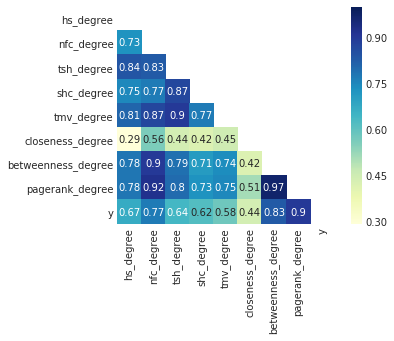

In [42]:
corr = data.corr().round(decimals =2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, annot = True,
                     vmax = 1, square =True, cmap='YlGnBu')

# Graph

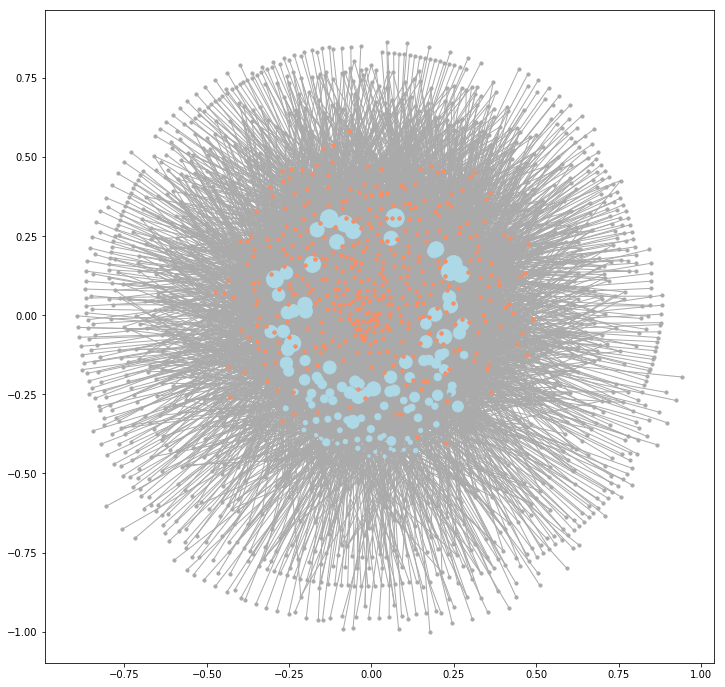

In [43]:
plt.figure(figsize=(12,12))
layout = nx.kamada_kawai_layout(G)


nx.draw_networkx_edges(G, layout, edge_color='#AAAAAA')

funds = [node for node in G.nodes() if node in df.fund_code.unique()]
fund_size = [G.degree(fund_code) for fund_code in funds]
nx.draw_networkx_nodes(G, layout, nodelist=funds, node_color='lightblue', 
                       node_size=fund_size)
stocks = [node for node in G.nodes() if node in df.stock.unique()]
nx.draw_networkx_nodes(G, layout, nodelist=stocks, node_size=10, node_color='#AAAAAA')

high_degree_stock = [node for node in G.nodes() if node in df.stock.unique() and G.degree(node) > 7.5]
nx.draw_networkx_nodes(G, layout, nodelist=high_degree_stock, node_size=10, node_color='#fc8d62')

pylab.rcParams['figure.figsize'] = (8, 8)
pylab.savefig('fund_graph.png', dpi=400, bbox_inches = 'tight')